In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

In [3]:
#import os

# Function to rename multiple files
#def main():
    #folder = "C:/Users/tushar swarnkar/Tushar anaconda/Project hackathon/valid/Soil types/Black Soil"
    #for count, filename in enumerate(os.listdir(folder)):
        # Construct the new filename
        #dst = f"Black_Soil_{str(count)}.jpg"
        # Construct source and destination paths
        #src = os.path.join(folder, filename)
        #dst = os.path.join(folder, dst)
        # Rename the file
        #os.rename(src, dst)

# Driver code
#if __name__ == '__main__':
    #main()


In [4]:
import os
path,dir,files = next(os.walk("train"))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  275


In [5]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

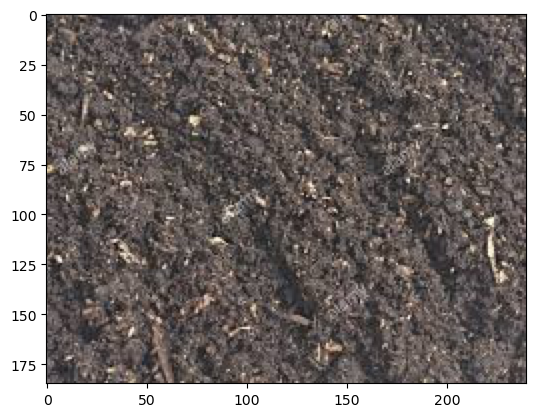

In [6]:
img = mpimg.imread('C:/Users/tushar swarnkar/Tushar anaconda/Project hackathon/valid/train/Black_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

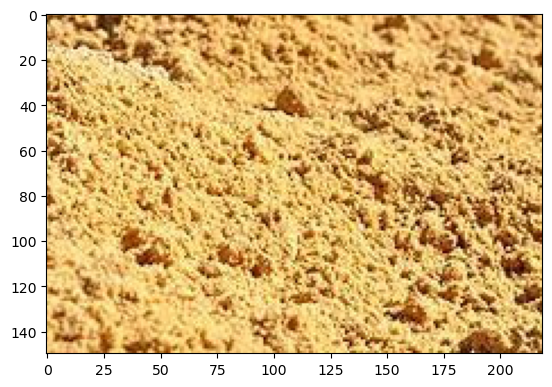

In [7]:
img = mpimg.imread(r'C:/Users/tushar swarnkar/Tushar anaconda/Project hackathon/valid/train/Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
filenames = os.listdir('train')

In [9]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for files in filenames:
    if files[0:5] == 'Black':
        black.append(files)
    elif files[0:6] == 'Cinder':
        cinder.append(files)
    elif files[0:8] == 'Laterite':
        laterite.append(files)
    elif files[0:4] == 'Peat':
        peat.append(files)
    elif files[0:6] == 'Yellow':
        yellow.append(files)
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

37 60 60 60 58


In [11]:
os.mkdir('images_resized')
original_path = 'train'
new_path = 'images_resized/'

In [12]:
from PIL import Image
import os, sys

def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):

   #srcfile_path : the complete path to source file
   src_path = srcdir+srcfile

   targetfile = os.path.splitext(srcfile)
   extension = os.path.splitext(srcfile)[1]
     
   if srcfile != targetfile:
       try :
          im = Image.open(src_path)  # open file
          im = im.rotate(90) # degrees counter-clockwise
          im = im.resize(size) # resize the file
          im.save(targetdir+targetfile[0]+'__'+".jpg")
       except IOError:
          print ("cannot change image for ", srcfile)
   if __name__=="__main__":
      targetdir = "images_reized1/"
      srcdir = "images_resized/"

   for file in os.listdir(srcdir):
      resize_rename_rotate(srcdir,file,targetdir)

In [13]:
for i in range(len(filenames)):
   filename = os.listdir(path)[i]
   f_img = path+"/"+filename
   img = Image.open(f_img)
   img = img.resize((224, 224)) #(width, height)
   img = img.convert('RGB')
   new_img_path = new_path+'/'+filename
   img.save(new_img_path)

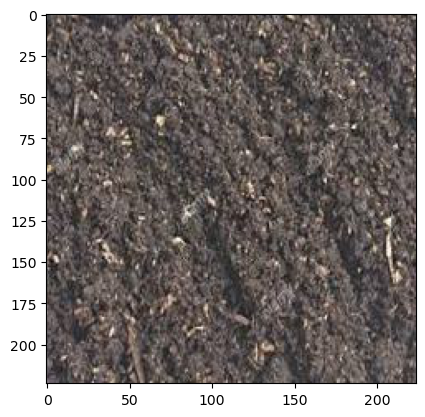

In [14]:
img = mpimg.imread(r'C:/Users/tushar swarnkar/Tushar anaconda/Project hackathon/valid/images_resized/Black_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

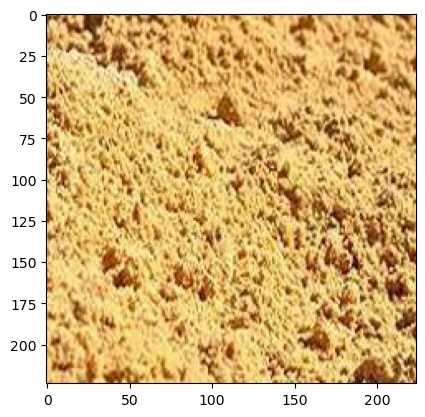

In [15]:
img = mpimg.imread(r'C:/Users/tushar swarnkar/Tushar anaconda/Project hackathon/valid/images_resized/Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
import glob

In [17]:
image_directory = 'images_resized/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
soil_images.shape

(275, 224, 224, 3)

In [19]:
filenames = os.listdir('images_resized/')

In [20]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:5] == 'Black':
        labels.append(0)
    elif files[0:6] == 'Cinder':
        labels.append(1)
    elif files[0:8] == 'Laterite':
        labels.append(2)
    elif files[0:4] == 'Peat':
        labels.append(3)
    elif files[0:6] == 'Yellow':
        labels.append(4)

In [21]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(37, 60, 60, 60, 58)

In [22]:
X = soil_images
Y = np.asarray(labels)

In [23]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [25]:
Y_train.shape,Y_test.shape

((220,), (55,))

In [26]:
X_train_scaled = X_train/255

In [27]:
X_test_scaled = X_test/255

In [33]:
import tensorflow_hub as hub


ModuleNotFoundError: No module named 'keras.api'

In [30]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

NameError: name 'hub' is not defined

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [ ]:
number_of_classes = 5

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4,227,141
Trainable params: 1,969,157
Non-

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
history = model.fit(X_train_scaled,Y_train,epochs=5,validation_split=0.25,batch_size=16)

Epoch 1/5


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

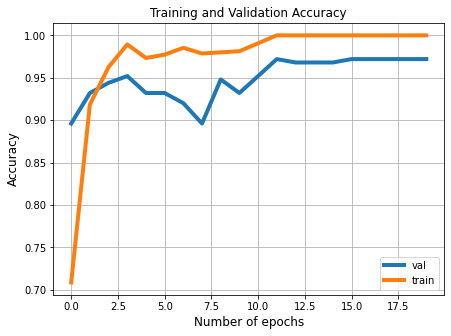

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

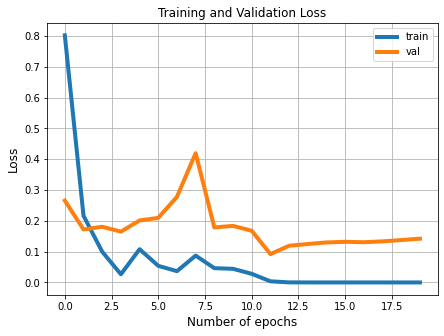

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [ ]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

8/8 [==============================] - 1s 74ms/step - loss: 0.0693 - acc: 0.9800
Test Loss =  0.06929057836532593
Test Acc =  0.9800000190734863


0
Black Soil


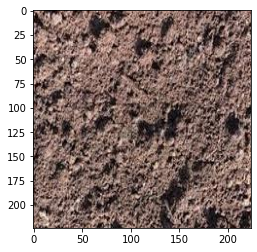

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Black_Soil_ (1).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Black_Soil_ (1).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

4
Yellow Soil


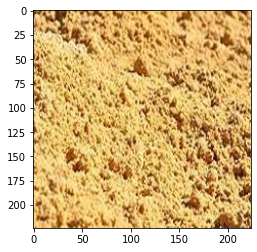

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Yellow_Soil_ (1).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Yellow_Soil_ (1).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

0
Black Soil


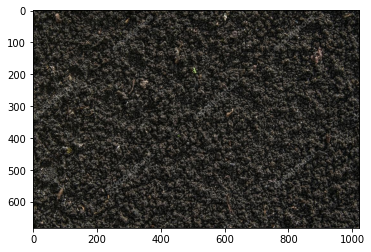

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\black soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\black soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

4
Yellow Soil


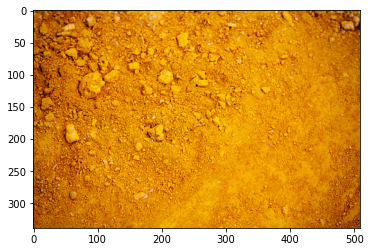

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

3
Peat Soil


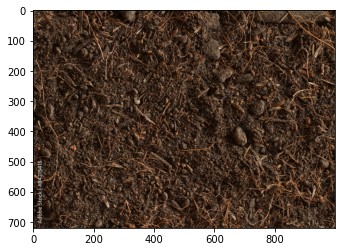

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [ ]:
# model.save('my_model.h5')